# Doc para testear y mirar cómo son los datos inicialmente
Alejandro Jaramillo

19/04/2024

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
months = ['Gener', 'Febrer', 'Marc', 'Abril', 'Maig', 'Juny', 'Juliol', 'Agost', 'Setembre', 'Octubre', 'Novembre', 'Desembre']
indeces = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
years = ['2020', '2021', '2022', '2023']

In [3]:
## OJO ##
# EN 2021 Y 2022 EL DOCUMENTO SE LLAMA MARÇ EN VEZ DE MARC, HAY QUE CAMBIARLO A MARC PARA QUE FUNCIONE

years = [2023]

data = pd.DataFrame()
for year in years:
    for index, month in zip(indeces, months):
        month_year = pd.read_csv('../raw_data/{}_{}_{}_BicingNou_ESTACIONS.csv'.format(year, index, month))
        data = pd.concat([data, month_year])

/var/folders/gt/v7xq73cx0nj74cmjgsw8ql_00000gn/T/ipykernel_84052/408983374.py:9: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  month_year = pd.read_csv('../raw_data/{}_{}_{}_BicingNou_ESTACIONS.csv'.format(year, index, month))
/var/folders/gt/v7xq73cx0nj74cmjgsw8ql_00000gn/T/ipykernel_84052/408983374.py:9: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  month_year = pd.read_csv('../raw_data/{}_{}_{}_BicingNou_ESTACIONS.csv'.format(year, index, month))


In [5]:
data = data.drop('V1', axis = 1)
data

,station_id,num_bikes_available,num_bikes_available_types.mechanical,num_bikes_available_types.ebike,num_docks_available,last_reported,is_charging_station,status,is_installed,is_renting,is_returning,traffic,last_updated,ttl
0,1.0,38.0,35.0,3.0,8.0,1.672528e+09,True,IN_SERVICE,1.0,1.0,1.0,NaN,1.672528e+09,19.0
1,2.0,6.0,5.0,1.0,23.0,1.672527e+09,True,IN_SERVICE,1.0,1.0,1.0,NaN,1.672528e+09,19.0
2,3.0,20.0,20.0,0.0,7.0,1.672527e+09,True,IN_SERVICE,1.0,1.0,1.0,NaN,1.672528e+09,19.0
3,4.0,19.0,19.0,0.0,2.0,1.672528e+09,True,IN_SERVICE,1.0,1.0,1.0,NaN,1.672528e+09,19.0
4,5.0,4.0,3.0,1.0,35.0,1.672527e+09,True,IN_SERVICE,1.0,1.0,1.0,NaN,1.672528e+09,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4525541,515.0,5.0,5.0,0.0,19.0,1.704064e+09,True,IN_SERVICE,1.0,1.0,1.0,NaN,1.704065e+09,1.0
4525542,516.0,10.0,2.0,8.0,10.0,1.704064e+09,True,IN_SERVICE,1.0,1.0,1.0,NaN,1.704065e+09,1.0
4525543,517.0,8.0,1.0,7.0,11.0,1.704064e+09,True,IN_SERVICE,1.0,1.0,1.0,NaN,1.704065e+09,1.0
4525544,518.0,3.0,1.0,2.0,24.0,1.704064e+09,True,IN_SERVICE,1.0,1.0,1.0,NaN,1.704065e+09,1.0


array([[<Axes: title={'center': 'station_id'}>]], dtype=object)

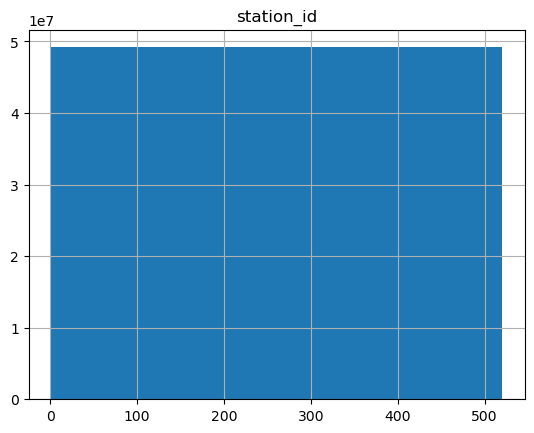

In [10]:
data.hist('station_id', bins = 1)
# uniforme, mismas instancias de todos los valores

array([[<Axes: title={'center': 'num_bikes_available'}>]], dtype=object)

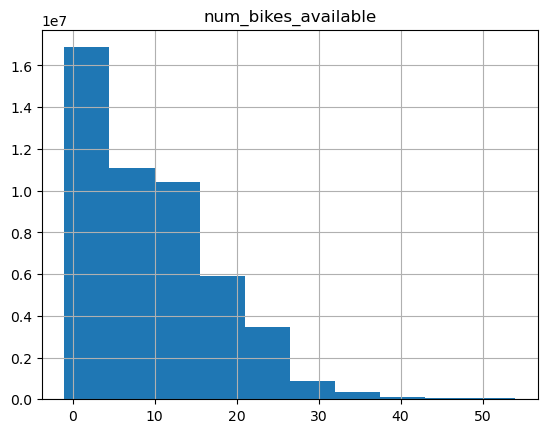

In [11]:
data.hist('num_bikes_available')
# no hay outliers

array([[<Axes: title={'center': 'num_bikes_available_types.mechanical'}>]],
      dtype=object)

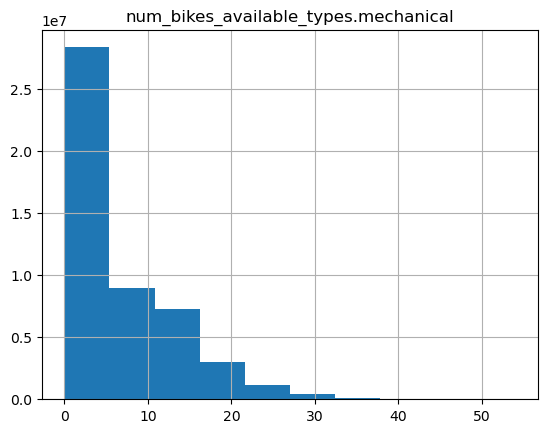

In [12]:
data.hist('num_bikes_available_types.mechanical')
# no hay outliers

array([[<Axes: title={'center': 'num_bikes_available_types.ebike'}>]],
      dtype=object)

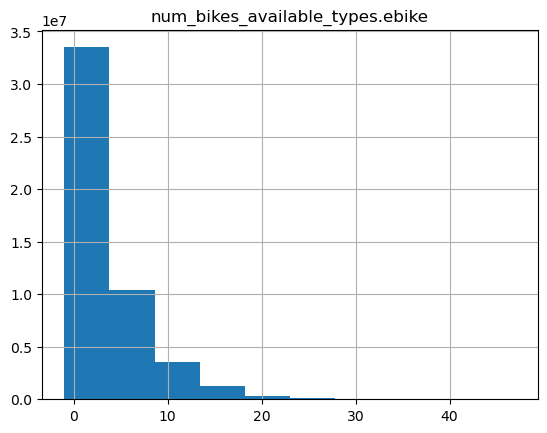

In [13]:
data.hist('num_bikes_available_types.ebike')
# no hay outliers

array([[<Axes: title={'center': 'last_reported'}>]], dtype=object)

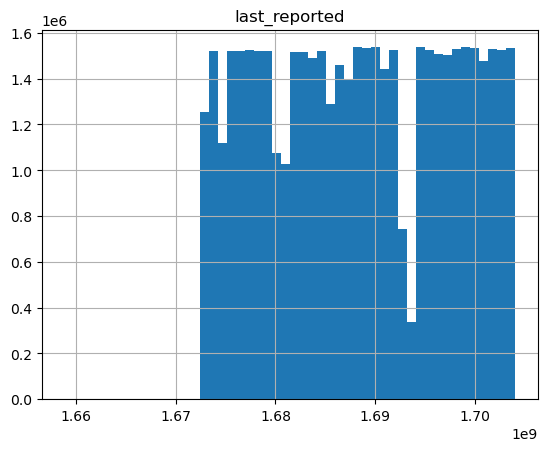

In [27]:
data.hist('last_reported', bins = 50)

is_charging_station
True    49189882
Name: count, dtype: int64


<Axes: xlabel='is_charging_station'>

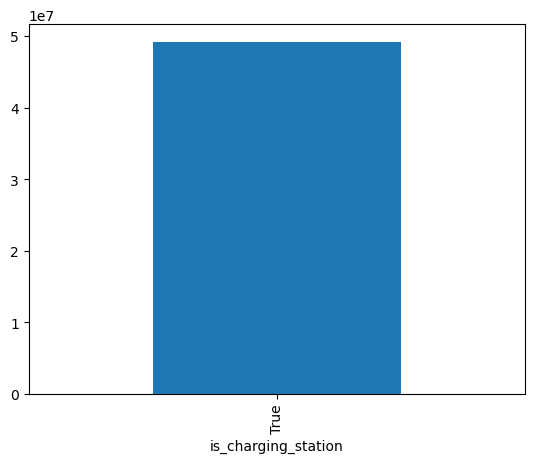

In [34]:
print(data['is_charging_station'].value_counts())
data['is_charging_station'].value_counts().plot.bar()

status
IN_SERVICE        49073608
NOT_IN_SERVICE      107109
MAINTENANCE           8997
PLANNED                168
Name: count, dtype: int64


<Axes: xlabel='status'>

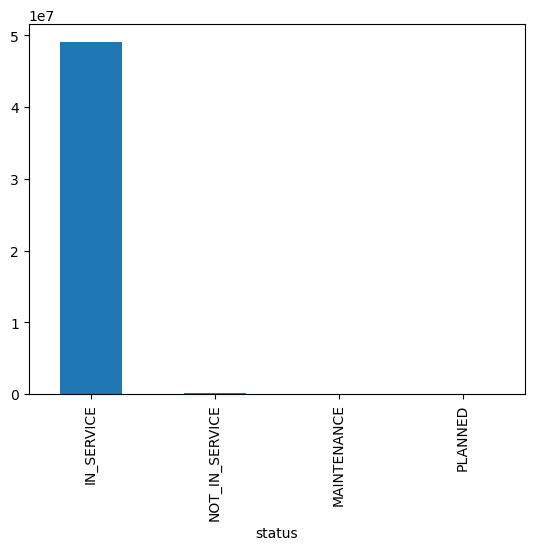

In [33]:
print(data['status'].value_counts())
data['status'].value_counts().plot.bar()

is_installed
1.0    49189714
0.0         168
Name: count, dtype: int64


<Axes: xlabel='is_installed'>

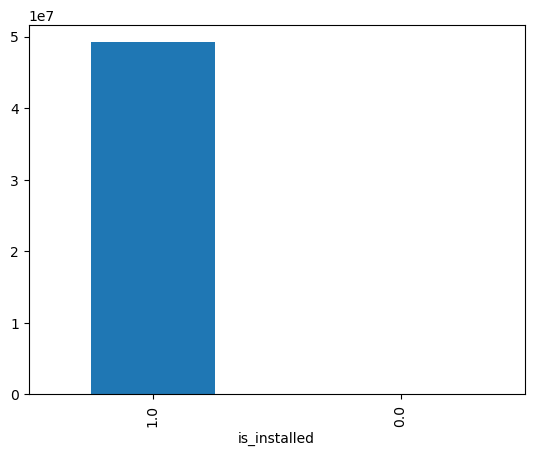

In [32]:
print(data['is_installed'].value_counts())
data['is_installed'].value_counts().plot.bar()

is_renting
1.0    49073492
0.0      116390
Name: count, dtype: int64


<Axes: xlabel='is_renting'>

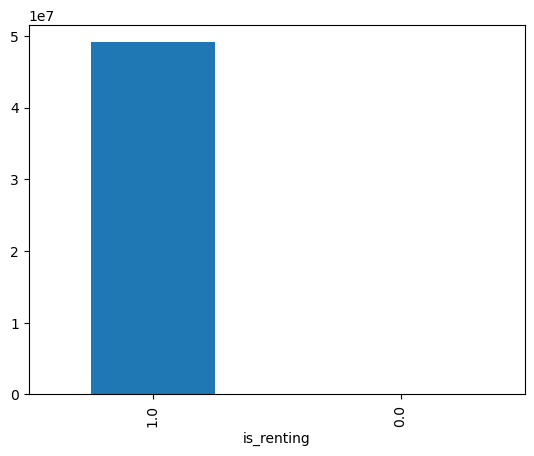

In [35]:
print(data['is_renting'].value_counts())
data['is_renting'].value_counts().plot.bar()

is_returning
1.0    49073608
0.0      116274
Name: count, dtype: int64


<Axes: xlabel='is_returning'>

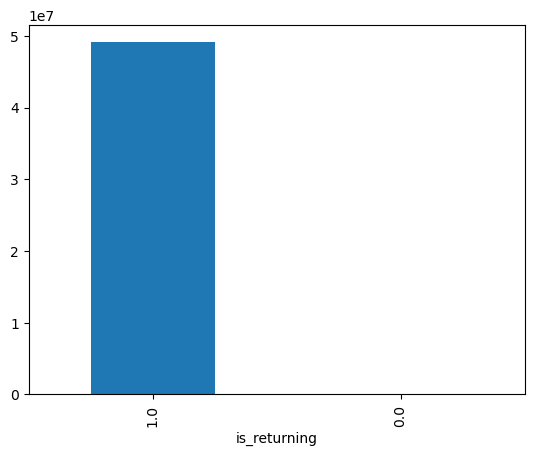

In [36]:
print(data['is_returning'].value_counts())
data['is_returning'].value_counts().plot.bar()

In [39]:
print(data['traffic'].value_counts())
# no hay nada

Series([], Name: count, dtype: int64)


In [40]:
data['traffic']

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
           ..
4525541   NaN
4525542   NaN
4525543   NaN
4525544   NaN
4525545   NaN
Name: traffic, Length: 49193647, dtype: float64

array([[<Axes: title={'center': 'last_updated'}>]], dtype=object)

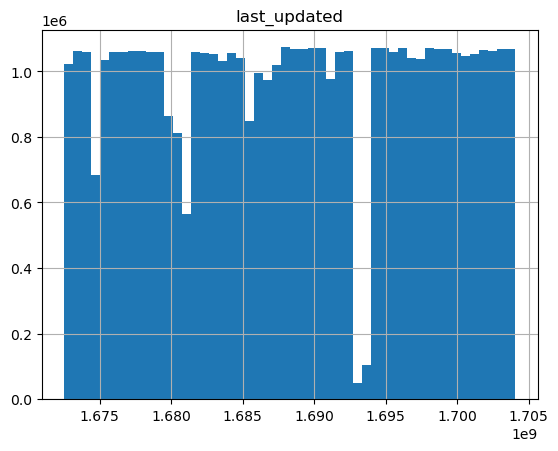

In [42]:
data.hist('last_updated', bins = 50)

array([[<Axes: title={'center': 'ttl'}>]], dtype=object)

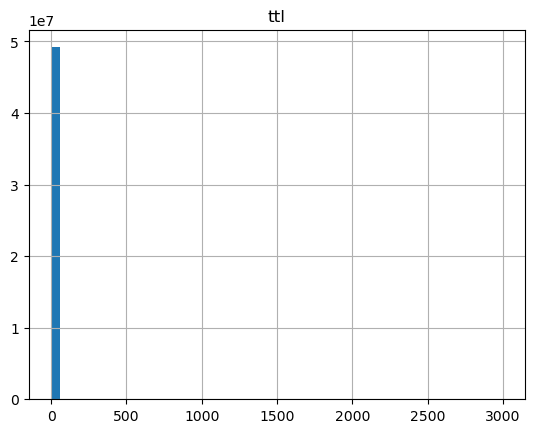

In [45]:
data.hist('ttl', bins = 50)

In [44]:
data['ttl'].value_counts()

ttl
0.0       10936333
1.0        2473090
19.0       1457524
21.0       1429478
20.0       1428535
2.0        1380806
9.0        1363319
17.0       1361177
18.0       1325340
22.0       1315756
24.0       1289849
13.0       1287193
26.0       1281104
23.0       1264003
3.0        1255205
4.0        1231437
14.0       1230296
16.0       1224068
15.0       1217955
25.0       1207590
5.0        1199817
11.0       1198234
27.0       1177440
12.0       1171778
8.0        1169169
7.0        1167306
6.0        1164035
29.0       1163826
10.0       1153287
28.0       1137566
30.0        526856
2995.0         510
Name: count, dtype: int64